<a href="https://colab.research.google.com/github/MonikaLamba/DEEPLEARNING/blob/master/GSE25066_BARPLOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn import metrics

import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/content/GSE25066_SELECTED_GENES_AFTER_CONSISTENCY_BFS_1.csv')

In [5]:
var_columns = [c for c in data if c not in ['GRADE']]
X = data.loc[:,var_columns]
y = data.loc[:,'GRADE']

In [6]:
model_rf = RandomForestClassifier(class_weight='balanced',
                                  criterion='gini',
                                  max_depth=55,
                                  max_features='log2',
                                  min_samples_leaf=0.005,
                                  min_samples_split=0.005,
                                  n_estimators=190)
model_rf.fit(X, y)

RandomForestClassifier(class_weight='balanced', max_depth=55,
                       max_features='log2', min_samples_leaf=0.005,
                       min_samples_split=0.005, n_estimators=190)

In [7]:
df_var_imp = pd.DataFrame({'Variable': var_columns,
                           'Importance': model_rf.feature_importances_}) \
                .sort_values(by='Importance', ascending=False) \
                .reset_index(drop=True)

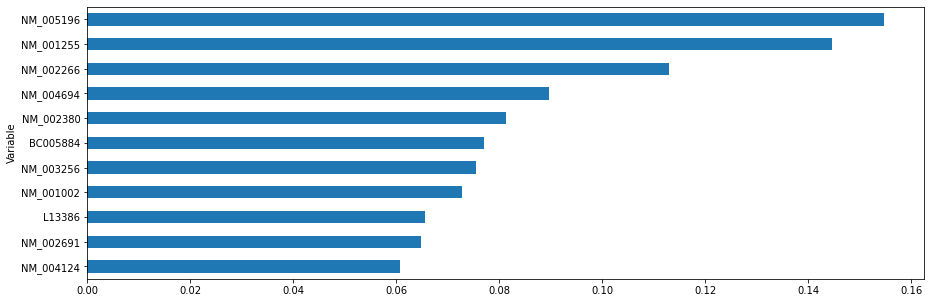

In [10]:
df_var_imp[:15].sort_values('Importance').plot('Variable','Importance', 'barh', figsize=(15,5), legend=False)

In [11]:
data.columns

Index(['L13386', 'NM_001002', 'NM_002266', 'NM_002380', 'NM_004124',
       'NM_001255', 'NM_002691', 'NM_003256', 'NM_004694', 'NM_005196',
       'BC005884', 'GRADE'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


ValueError: ignored

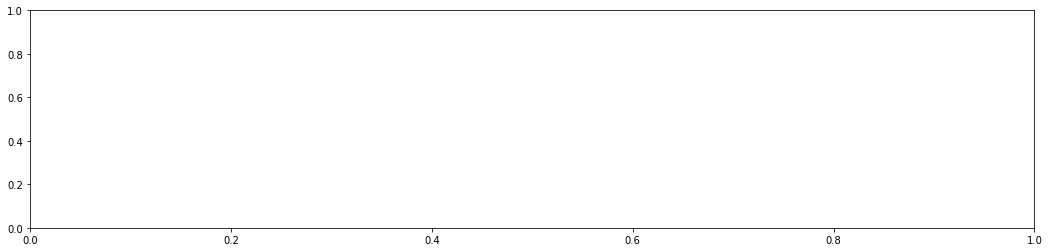

In [14]:
fig,ax = plt.subplots(figsize=(18, 4))
plot_partial_dependence(model_rf, X, ['L13386', 'NM_001002', 'NM_002266'],grid_resolution=20, ax=ax);